## Visualize and clusterize the data in the file x_12d.dat (N=600 samples, L=12 dimensions), which also has labels for checking the performances (y_12d.dat)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

### 2. Understanding the 12-dimensional data
    
Use the principal component analysis (PCA) to visualize the first components of the data.
Does it help understand its structure?

In [15]:
features = np.arange(1,13)
df_x = pd.DataFrame(standardized_data, columns=features)
#plots = sns.pairplot(df_x)

NameError: name 'standardized_data' is not defined

In [42]:
df_x

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.405656,0.545283,-0.738290,-0.897148,-0.533442,-0.442731,-1.200812,-0.107464,0.527320,-0.444542,0.400215,-0.525417
1,1.536225,-1.300011,0.859137,-1.018885,-1.820382,-0.605589,0.120529,-0.939768,0.003524,-0.431952,1.027030,-0.885716
2,1.205138,-1.405285,1.236747,0.677081,-0.748412,-0.126919,1.264994,-1.573031,-1.456222,0.439780,-0.382878,0.222076
3,1.048278,0.369528,-0.720607,-1.442771,-1.389322,-0.827645,-0.873154,0.158576,0.139453,-1.041188,1.911985,-1.596162
4,1.718365,-0.870662,1.306407,-0.436340,-1.758162,-0.598367,0.185689,-1.665605,-0.005985,-0.129705,1.850406,-1.023004
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.541773,0.792848,-1.468196,-1.465139,-0.766074,-1.972418,-1.188958,0.689466,0.298365,-1.288709,1.126563,-1.707944
596,0.622893,0.480256,-0.360662,-0.973090,-0.617623,-0.576041,-0.910961,-0.492547,0.523629,-0.202971,0.362808,-1.249548
597,-0.334442,-0.650599,0.310956,0.498839,0.383572,0.762825,0.027824,-0.116867,0.666469,0.410133,-0.740315,0.425426
598,-0.867901,1.792931,-1.381635,-0.629568,0.734748,-0.280205,-1.339067,1.850599,0.342598,-1.066207,-0.171214,-0.090763


In [3]:
def standardize(data):
    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)
    standardized_data = (data - data_mean ) / data_std
    return standardized_data

standardized_data = standardize(x)

[0.4763583  0.31041612 0.15690151 0.01590454 0.00853639 0.00727203
 0.00698648 0.00500173 0.00459913 0.00352647 0.00251184 0.00198545]


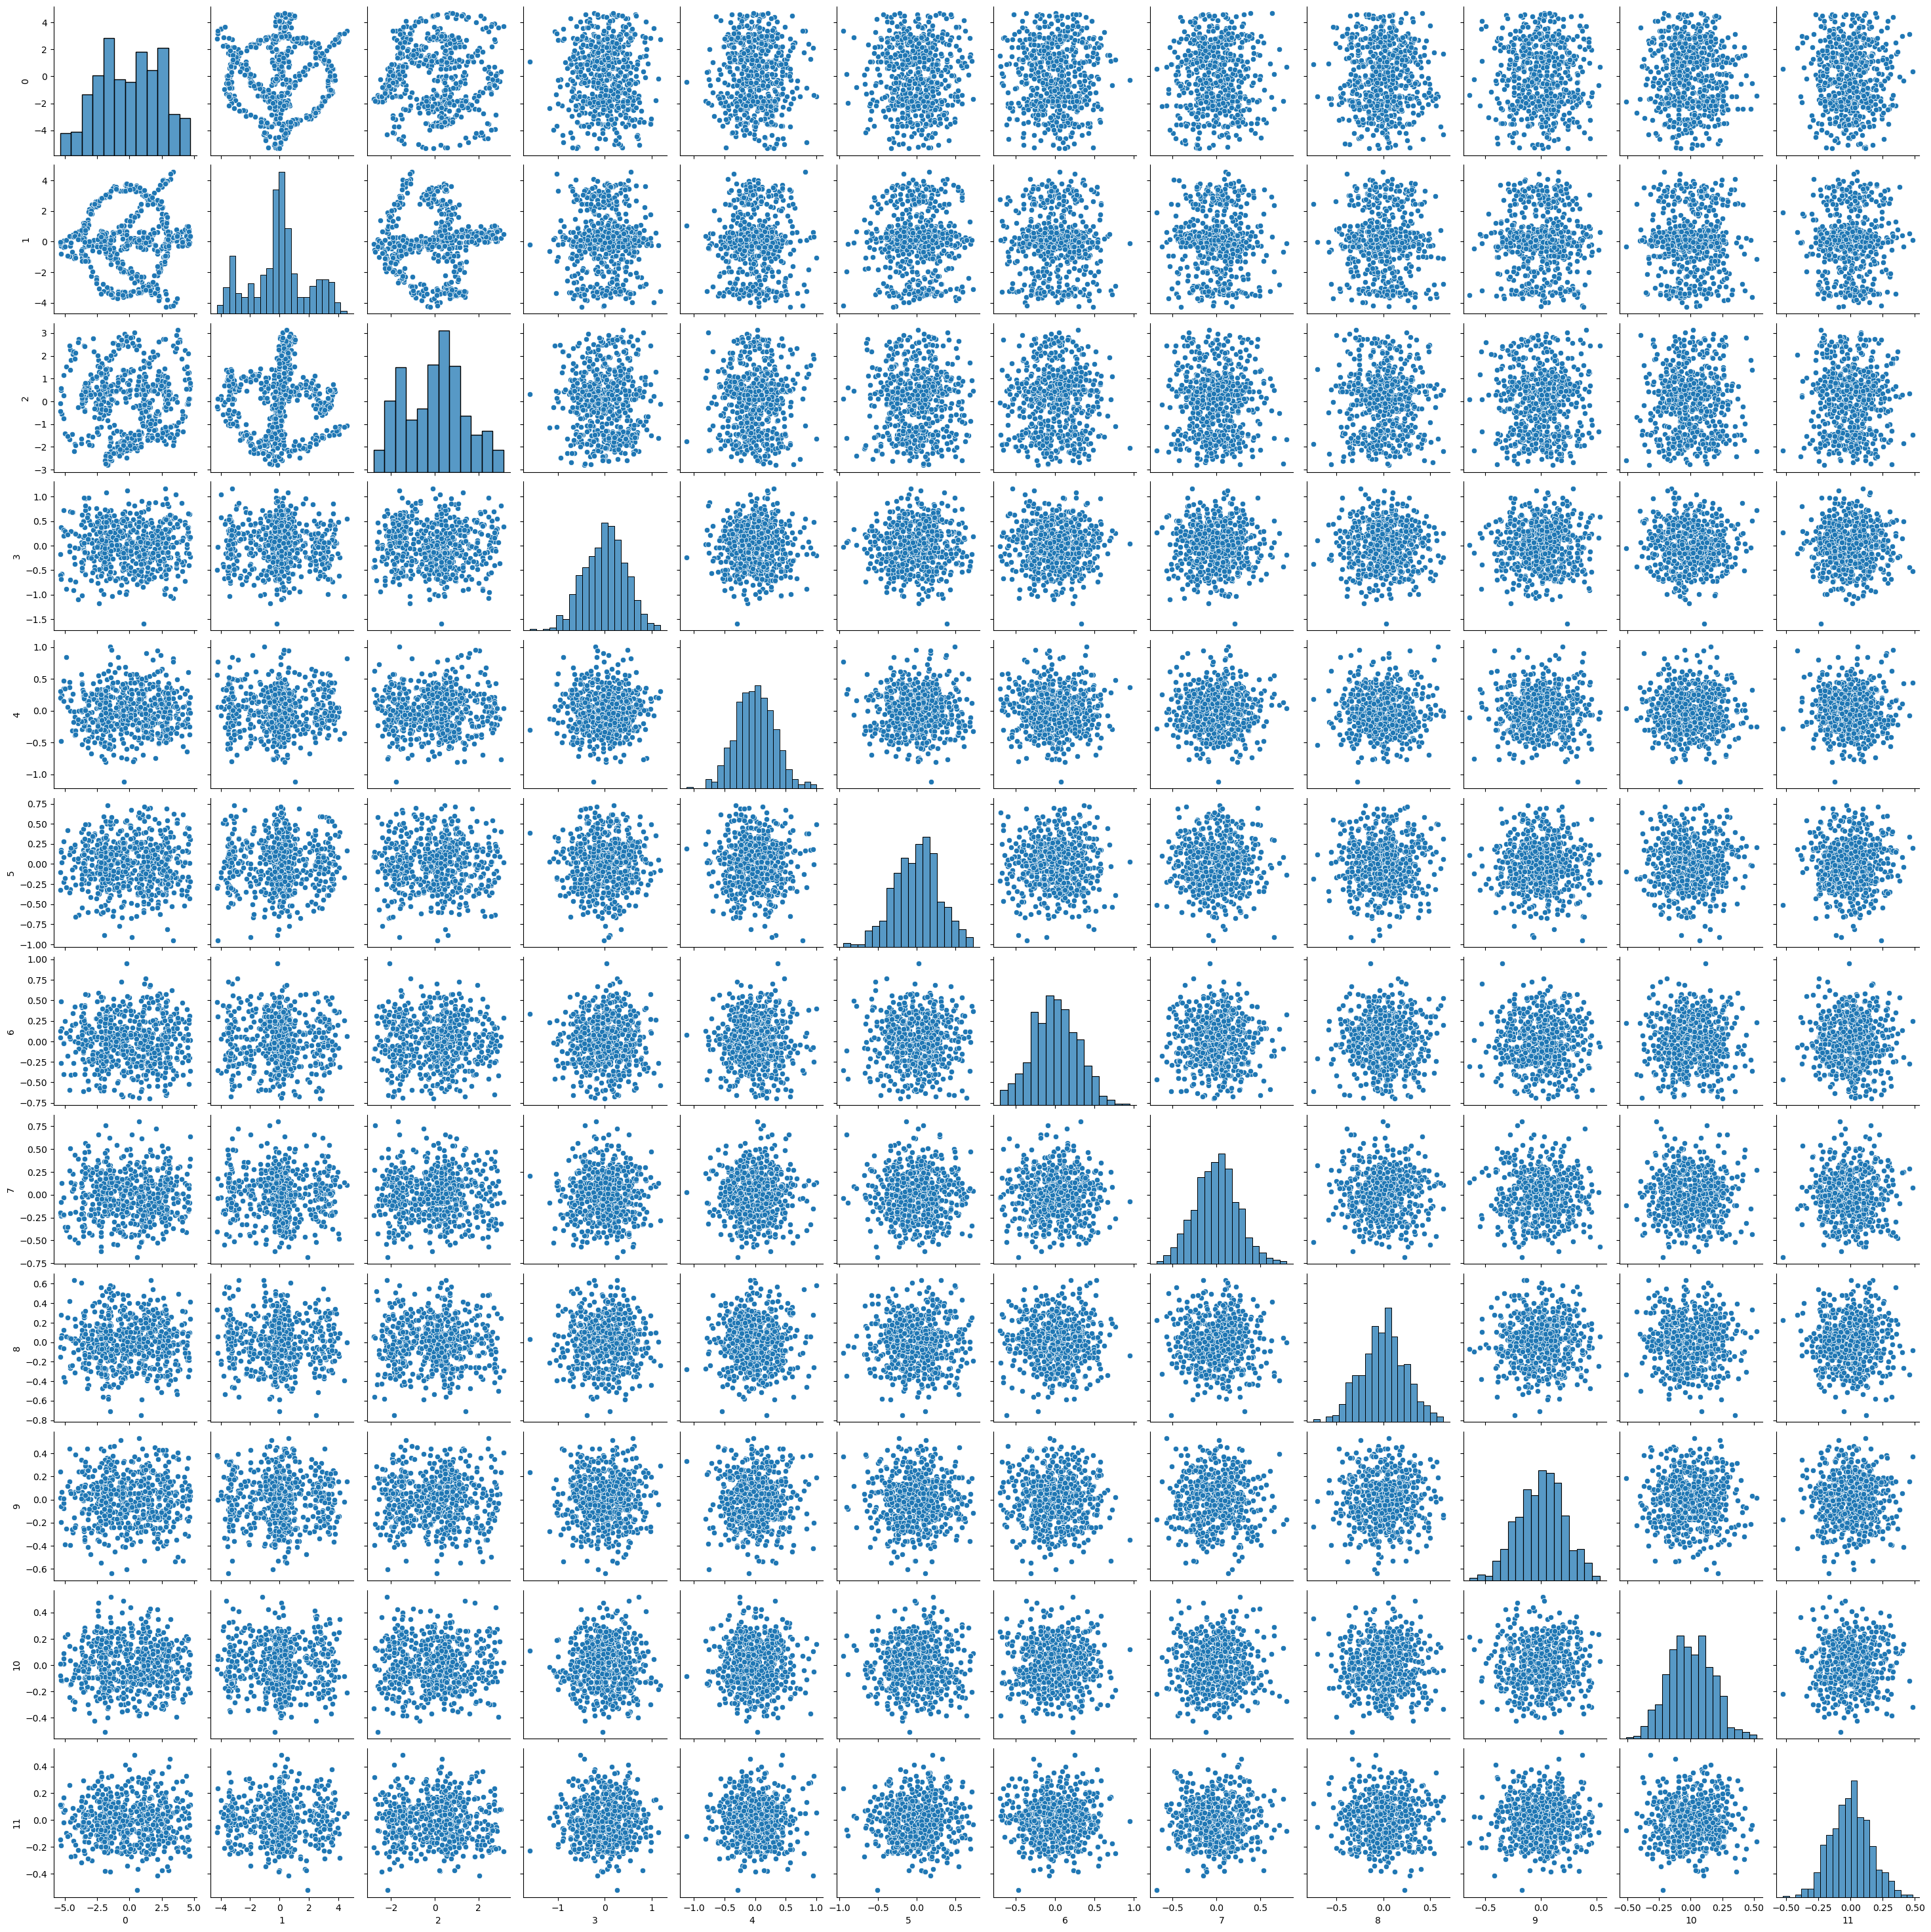

In [17]:
PC = PCA()
PC.fit(standardized_data)
print(PC.explained_variance_ratio_)
reduced = PC.transform(standardized_data)

reduced_df = pd.DataFrame(reduced)
sns.pairplot(reduced_df)
plt.show()

Yes, I understand


### 3. Compare with k-means

Perform a k-means clustering of the data, with k=3. Does it work better than DBSCAN?
Why?

In [32]:
kmeans = KMeans(n_clusters=2)
cluster_centers = kmeans.fit_predict(standardized_data)

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

### 4. OPTIONAL: Compare with hierarchical clustering
Perform a hierarchical clustering of the data and plot the corresponding dendrogram. Does it
work better than DBSCAN? Which measure did you use for distance (distance of closest
points between clusters, distance between cluster centers, …)? Does it affect the result?

### 5. OPTIONAL: Visualize the data with other methods from the scikit package